In [4]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# 데이터베이스 연결 설정
db_connection = mysql.connector.connect(
    host="localhost",
    user="jongwoonglee",
    password="0075",
    database="online_retail_dataset",
    port = '3307'
)

In [5]:

# 쿼리 실행 및 데이터 추출
query = """
    SELECT DISTINCT CustomerID, COUNT(DISTINCT(InvoiceDate)) AS OrderCount
    FROM `sales_raw`
    GROUP BY CustomerID
    ORDER BY OrderCount DESC
    LIMIT 5000;
"""

data = pd.read_sql(query, con=db_connection)


C:\Users\dlwhd\AppData\Local\Temp\ipykernel_31572\2298738129.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, con=db_connection)


In [6]:
data

,CustomerID,OrderCount
0,14911.0,248
1,12748.0,225
2,17841.0,168
3,14606.0,129
4,15311.0,118
...,...,...
4367,18256.0,1
4368,18262.0,1
4369,18278.0,1
4370,18280.0,1


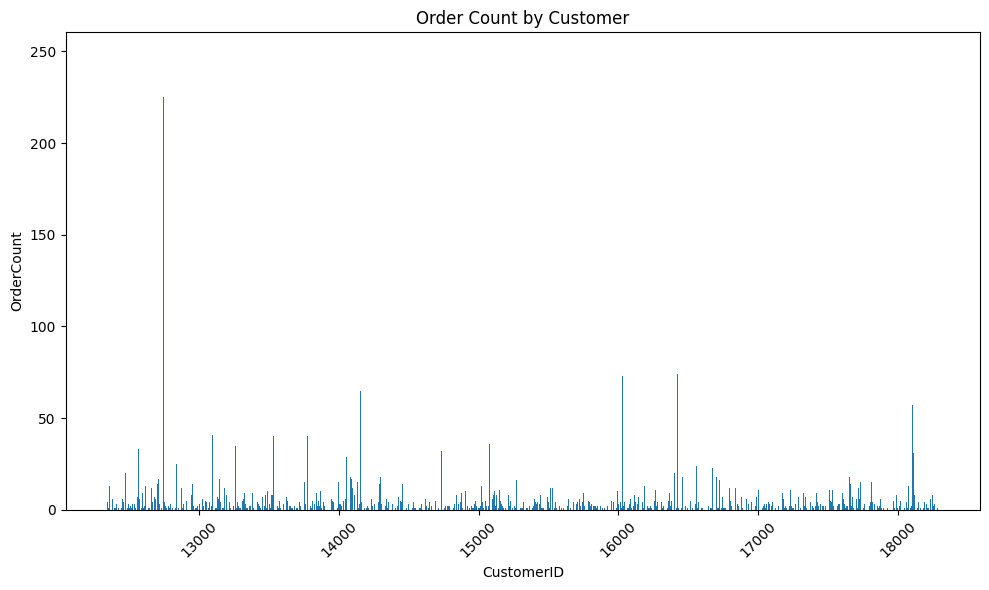

In [7]:
# 데이터 시각화
plt.figure(figsize=(10, 6))
plt.bar(data['CustomerID'], data['OrderCount'])
plt.xlabel('CustomerID')
plt.ylabel('OrderCount')
plt.title('Order Count by Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [8]:
data.describe()

,CustomerID,OrderCount
count,4372.000000,4372.000000
mean,15299.677722,5.039799
std,1722.390705,9.248607
min,12346.000000,1.000000
25%,13812.750000,1.000000
50%,15300.500000,3.000000
75%,16778.250000,5.000000
max,18287.000000,248.000000


In [9]:
# 데이터베이스 연결 닫기
db_connection.close()